# Simulation 01





#### 2017-10-03                                     Josep Fortiana 

## Uniform random numbers in R

Strictly speaking, the correct term should be random sequences of numbers _(RSN)_, rather than the more usual (sequences of) random numbers. We are focusing on properties of the sequences themselves rather than of their images as sets of numbers. For instance, the sequence:

\begin{equation}
    1,2,3,4,5,\dots,1000,
\end{equation}

clearly is not random in the sense we intend to define. It is, however, uniformly spread on the set of integers between 1 and 1000. After this disclaimer, we will always use the less formal and common term _random numbers._

Randomness depends on “unpredictability” in the following precise sense: there are CD’s or downloadable files of random numbers. In such sequences, a given term, the hundredth, say, is known. It is not easy, however, to predict a given term from the preceding ones. Some authors use the term *pseudo-random numbers (or sequences)*, to tell
sequences generated by means of an algorithm from those obtained as a fortuitous output of some natural or artificial chaotic system. The second, strict type of random numbers, can possibly be needed for cryptographic applications but for Bayesian computations and, more generally, for statistical simulations we can safely use pseudo-random numbers, assuming they have a modicum of decent properties like, for instance, the default `Random` functions in `R`. In these notes we use the terms *random numbers,* or *random sequences of numbers* (rather than pseudo-random) for sequences having passed a given set of randomness tests, ignoring their deterministic condition.

For scientific application purposes, in particular simulations for Monte Carlo statistical computations, including *Markov Chain Monte Carlo MCMC)* Bayesian computations, and *bootstrap* estimations, as well as engineering simulations, what is needed is not strict randomness but, instead, *reproductibility* of results. Towards this end it is advisable to always register the specific algorithm and *seed(s)* (see below) used for generating the sequence, in case a repetition is required.

Nonetheless, it is good to know that the `random` R package allows us to generate random munbers in the strictest sense described above, by connecting with the web page [random.org](http://www.random.org/), belonging to a company commercializing this type of strictly random numbers. This page contains a big quantity of information about randomness and related concepts.

The simplest kind of generators is the _linear congruential_ generators. The algorithm gives a sequence of integers of the form:

$$
	x_{n} = A\,x_{n-1}\mskip25mu (\mskip-14mu\mod B)
$$

where $A, B$ are integers. The underlying principle is based on divisibility properties	of positive integers. Chapter 3 in _The Art of Computer Programming_ by [Donald Knuth](http://www-cs-faculty.stanford.edu/~uno/) features the theorems	on which these algorithms are based, plus much context information. See also [Aaron Schlegel, _Linear Congruential Generator in R_. R-bloggers](https://www.r-bloggers.com/linear-congruential-generator-in-r/)

The most *infamous* specimen of this family of generators, used to be distributed as firmware with all *mainframe* IBM computers sold in the 1960’s and 1970’s years, is called `RANDU`. Its notoriousness and fall in disgrace came from a 1968 paper by George Marsaglia, *Random Numbers Fall Mainly on the Planes* (a pun with the children song [The rain in
Spain,](http://www.youtube.com/watch?v=uVmU3iANbgk) in the musical film *My Fair Lady*).

In his paper, Marsaglia shows the appalling regularity exhibited by the presumed random output of `RANDU`, especially distressing if one remembers that simulations based on these numbers were used in the design of all sorts of systems, from plane wing cross-sections to nuclear plants, still in use to this day.

The following piece of code exhibits a version of `RANDU` together with code to demonstrate its suboptimal performance. It seems it doesn't work properly within Jupyter; better copy and paste it to the R console, uncommenting the lines referring to `rgl`. 

In [1]:
#find.package("rgl")
#install.packages("rgl", repos="https://cloud.r-project.org/")

In [2]:
#require(rgl)   #it is better not to run inside jupyter notebook. because it has 3D plot
seed <- as.double(1)
RANDU <- function() {
    seed <<- ((2^16 + 3) * seed) %% (2^31)
    seed/(2^31)
    }
N<-3000
X<-matrix(rep(0,3*N),N)
for(i in 1:N) {
    U <- c(RANDU(), RANDU(), RANDU(), RANDU(), RANDU())
    X[i,]<-round(U[1:3],6)
    }

#points3d(X[,1],X[,2],X[,3])

The uniform random numbers generators in the base package in R are
documented in the help page that you can display typing:

In [3]:
? Random

There you can find several (currently 7) different possible generators which can be chosen with the `RNGkind()` function. Additionally, it is possible to insert a user-supplied generator.

By default R uses a generator called *Mersenne twister*, described in the paper: Matsumoto, M. and Nishimura, T. (1998) *Mersenne Twister: A 623-dimensionally equidistributed uniform pseudorandom number generator*, ACM Transactions on Modeling and Computer Simulation **8**,3-30.

This whole issue in the journal was devoted to uniform random numbers generators: ACM Transactions on Modeling and Computer Simulation (TOMACS) - Special issue on uniform random number generation - Volume 8 Issue 1, Jan. 1998.

Googleing Mersenne twister you will find many implementations of this generator and variants thereof in many programming languages. Python’s default random generator also uses Mersenne twister.

# Pre-programmed distributions

Most often-used distributions, pre-programmed as functions in the `stats` R package, also have their pre-programmed random number generators.
Each of the probability distributions listed in Table A	has 4 functions whose names are formed from the suffix in the table, with different prefixes.If `X` is the suffix, the names of the functions are as follows (See Table B)

### Table A: Probability distributions

| Distribution        | Suffix    | Additional parameters |
|:--------------------|:----------|------------------------|
|  beta               | `beta`    |  `shape1, shape2, ncp`|
|  binomial           | `binom`   |  `size, prob`         |
|  Cauchy             | `cauchy`  |  `location, scale`    |
|  Chi square         | `chisq`   |  `df, ncp`            |
|  exponential        | `exp`     |  `rate`               |
|  F                  | `f`       |  `df1, df1, ncp`      |
|  gamma              | `gamma`   |  `shape, scale`       |
|  geometric          | `geom`    |  `prob`               |
|  hypergeometric     | `hyper`   |  `m, n, k`            |
|  log-normal         | `lnorm`   |  `meanlog, sdlog`     |
|  logistic           | `logis`   |  `location, scale`    |
|  negative binomial  | `nbinom`  |  `size, prob`         |
|  normal             | `norm`    |  `mean, sd`           |
|  Poisson            | `pois`    |  `lambda`             |
|  Student t          | `t`       |  `df, ncp`            |
|  uniform            | `unif`    |  `min, max`           |
|  Weibull            | `weibull` |  `shape, scale`       |
---

### Table B: Functions for probability distributions

| Prefix  |  Purpose          |
|:-------:|:-----------------------------------------------------------------------| 
|`dX`     |   Probability density function (pdf) or probability mass function (pmf),|
|`pX`     |   Cumulative (probability) distribution function (cdf),|
|`qX`     |   Quantile function, that is, the (pseudo)inverse of the cdf,|
|`rX`     |   Random numbers distributed as the stated distribution.|

The `rX` functions have a mandatory first parameter, the number of random numbers to be generated. Their output 	are finite sequences of numbers which we expect can be considered as a realization of a sequence of i.i.d. random variables with the named distribution.

### Exercise (long).

This is an exercise in both acquiring a feeling of the properties of several important probability distributions and also generating random numbers.

For each of the above probability distributions (you can start with the ones we mentioned in the last lesson, discrete and continuous uniform, binomial, hypergeometric, geometric, exponential, normal, then:

a) Beta, b) Poisson, c) Gamma, d) Cauchy, e) Student t

go through the following procedure:

1.  Have a look at its Wikipedia page. There you see its general
    properties, pdf or cdf, moments, and other relevant information.

2.  Plot its pmf or pdf and its cdf for several parameter values.

3.  Choose two or three values of $n$ (e.g., $n=100,1000,50000$).
    Generate vectors of random numbers of the specified sizes.

4.  Obtain numerical descriptive statistics of these vectors: such as
    empirical mean, variance, higher moments, median and other
    quartiles. Compare them with their theoretical counterparts.

5.  Plot the histogram of the randomly generated vectors either with
    the `hist` function in the `stats` package or the `truehist`
    function in the `MASS` package. Then superimpose the theoretical pdf
    or pmf on the histogram, in order to assess how close both functions
    are.


### Solution (part)

For instance, for the Beta family: [Beta distribution Wiki](https://en.wikipedia.org/wiki/Beta_distribution)

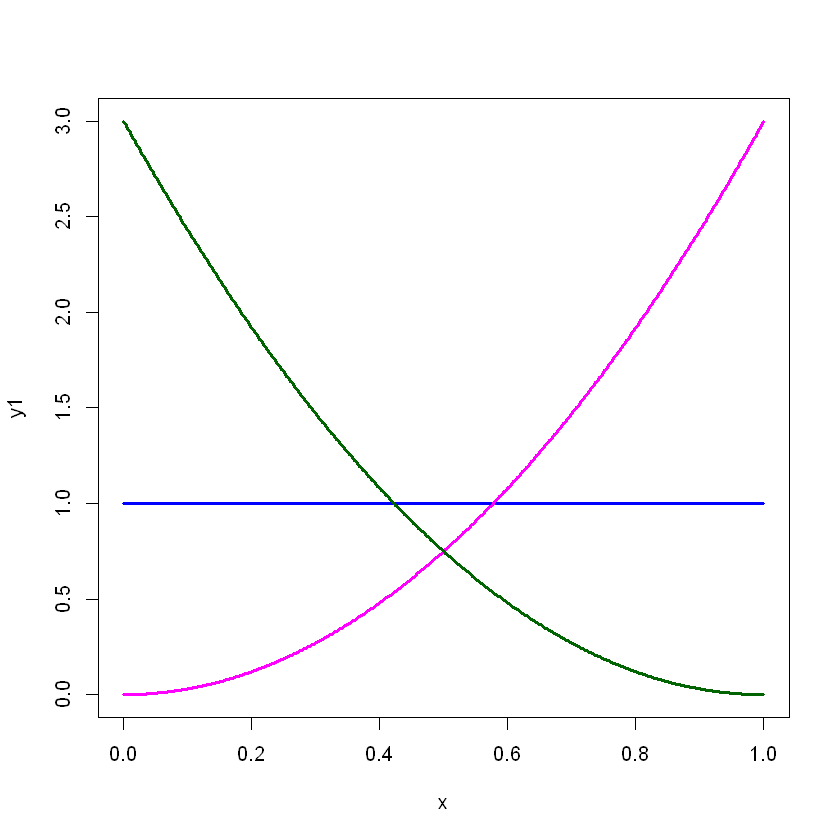

In [5]:
x<-seq(0,1,length=500)         
y1<-dbeta(x,shape1=1,shape2=1) # Beta(1,1) is the Unif[0,1] distribution
y2<-dbeta(x,shape1=3,shape2=1) # Beta(3,1) pdf is an increasing function on [0,1]
y3<-dbeta(x,shape1=1,shape2=3) # Beta(1,3) pdf is a decreasing function on [0,1]
plot(x,y1,type="l",lwd=2.5,col="blue",ylim=c(0,3))
lines(x,y2,lwd=2.5,col="magenta")
lines(x,y3,lwd=2.5,col="darkgreen")

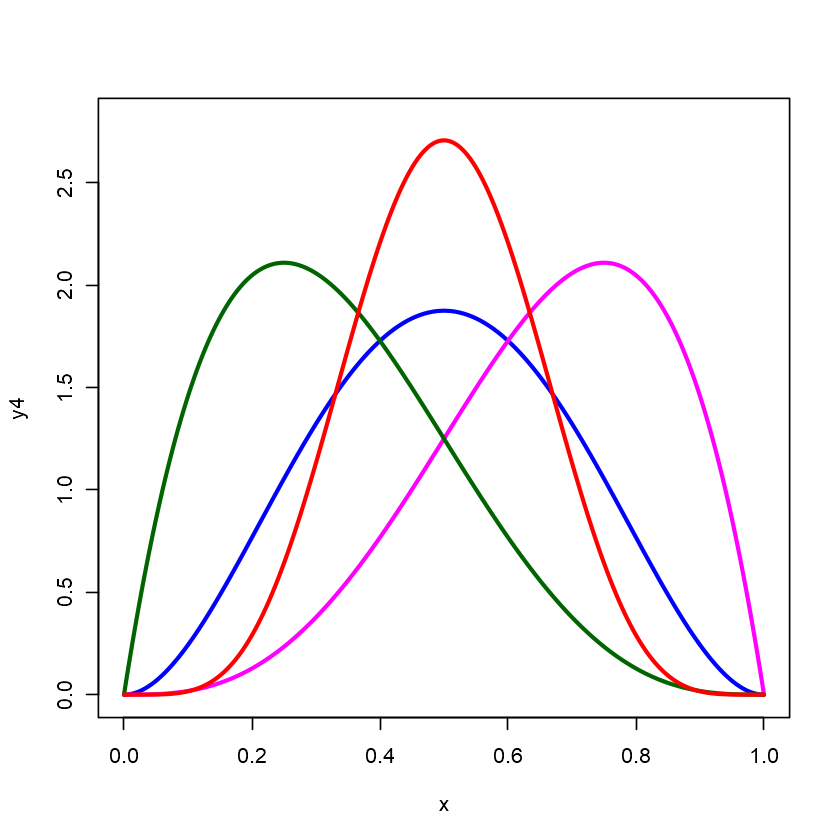

In [5]:
x<-seq(0,1,length=500)         
y4<-dbeta(x,shape1=3,shape2=3) # Distributions of the form Beta(a,a) are symmetrical (with respect to x=0.5)
y5<-dbeta(x,shape1=4,shape2=2) # Beta(a,b) distributions are unimodal (with one maximum). 
y6<-dbeta(x,shape1=2,shape2=4) # 
y7<-dbeta(x,shape1=6,shape2=6) 
plot(x,y4,type="l",lwd=2.5,col="blue",ylim=c(0,2.8))
lines(x,y5,lwd=2.5,col="magenta")
lines(x,y6,lwd=2.5,col="darkgreen")
lines(x,y7,lwd=2.5,col="red")  # peak is higher and sharper for larger parameters

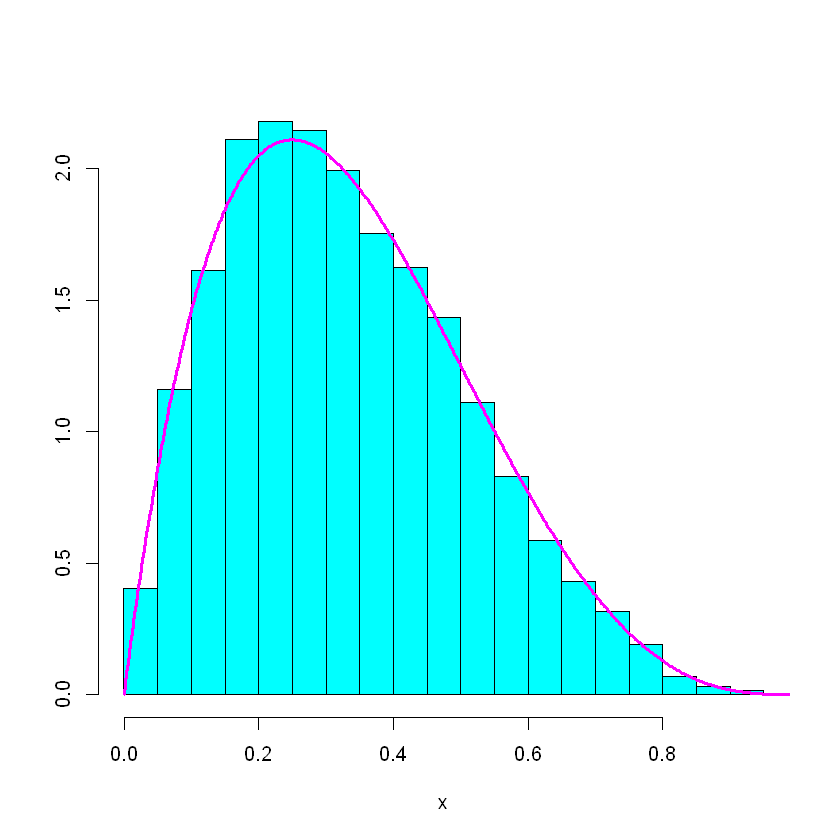

In [25]:
require(MASS)
n<-5000
#n<-5000
x<-rbeta(n,shape1=2,shape2=4)
truehist(x)
u<-seq(0,1,length=500) 
v<-dbeta(u,shape1=2,shape2=4)
lines(u,v,lwd=2.5,col="magenta") #Compare histogram and theoretical pdf

For a r.v. $X$ following a $\mbox{Beta}(\alpha,\beta)$ distribution,
\begin{align*}
    \mbox{E}(X)&=\frac{\alpha}{\alpha+\beta},\\
    \mbox{var}(X)&=\frac{\alpha\beta}{(\alpha+\beta)^2\cdot(\alpha+\beta+1)}.
\end{align*}

In [14]:
Beta.quantities<-function (a,b){
    EX<-a/(a+b)
    varX<-a*b/((a+b)^2*(a+b+1))
    return(EX=EX,varX=varX)
    }

For $\alpha=2$ and $\beta=4$,
\begin{align*}
    \mbox{E}(X)&=\frac{1}{3}=0.333\\
    \mbox{var}(X)&=2/63=0.032
\end{align*}

Which we compare to the corresponding empirical values in the sample:

In [15]:
mean(x)
var(x)

[1] 0.3309928

[1] 0.03155047